# Sparse Logistic Singular Value Decomposition: User Guide

We developed a Python package for Sparse Logistic Singular Value Decomposition (SLSVD) to analyze binary matrix data. The algorithm combines the Majorization-Minimization and Coordinate Descent algorithms. 

## Setup

Before starting, ensure you have installed the `slsvd` package and import the necessary libraries:

In [1]:
import slsvd
import numpy as np
import matplotlib.pyplot as plt

print(slsvd.__version__)

0.1.1


## Simulated Binary Matrix Data Generation

We generated binary matrix data by specifying the number of samples `n`, the number of features `d`, and the rank `rank`, with `random_seed` used for reproducibility.

In [2]:
from slsvd.data_generation import generate_data

In [3]:
bin_mat, loadings, scores, diagonal=generate_data(n=200, d=100, rank=2, random_seed=123)

In [4]:
bin_mat.shape

(200, 100)

In [5]:
loadings.shape

(100, 2)

In [6]:
scores.shape

(200, 2)

In [7]:
np.dot(loadings.T, loadings)

array([[1., 0.],
       [0., 1.]])

In [8]:
np.dot(scores.T, scores)

array([[195.4146256 ,   2.67535881],
       [  2.67535881, 200.14653178]])

In [9]:
np.count_nonzero(loadings, axis=0)

array([20, 20])

In [10]:
diagonal

array([[10,  0],
       [ 0,  5]])

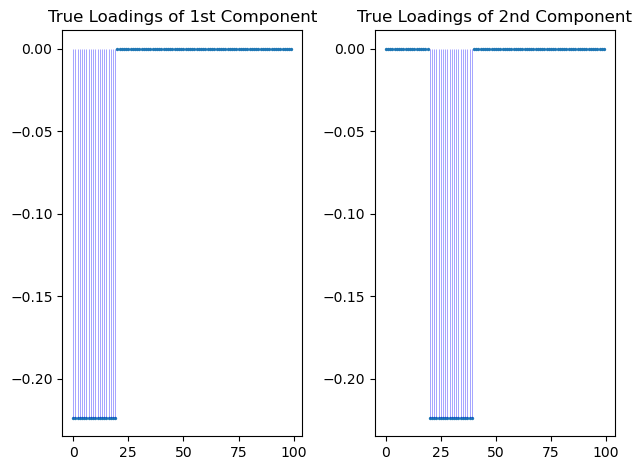

In [11]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)  # Adjust the size parameter
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5, linewidth=0.5)  # Adjust the line width
plt.title('True Loadings of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)  # Adjust the size parameter
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5, linewidth=0.5)  # Adjust the line width
plt.title('True Loadings of 2nd Component')

plt.tight_layout()
plt.show()


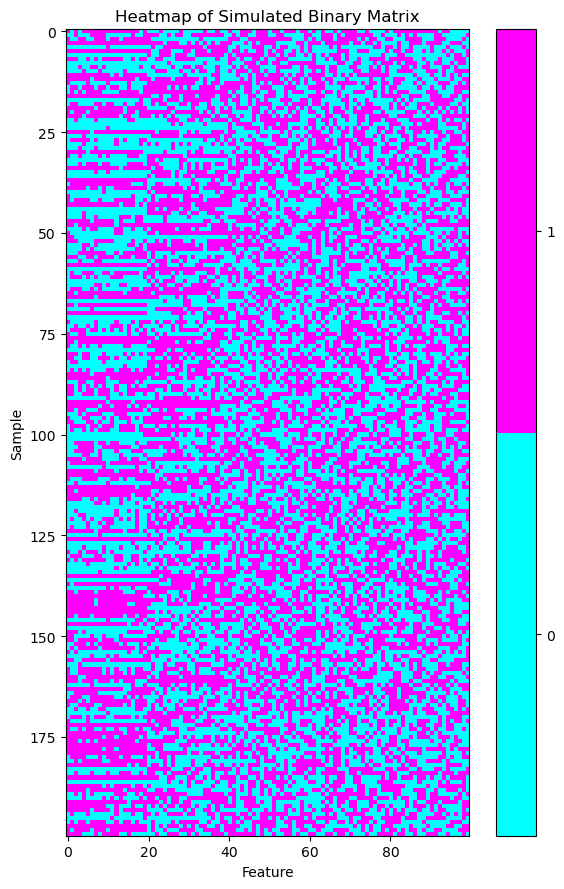

In [12]:
plt.figure(figsize=(6, 9))  # Adjust the width and height as needed

# Create a custom colormap using cyan and magenta
colors = ['cyan', 'magenta']
cmap = plt.matplotlib.colors.ListedColormap(colors, name='custom_cmap', N=2)

plt.imshow(bin_mat, cmap=cmap, interpolation='nearest')

cbar = plt.colorbar(ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(['0', '1'])

plt.title('Heatmap of Simulated Binary Matrix')
plt.xlabel('Feature')
plt.ylabel('Sample')

# Use tight layout to reduce white space
plt.tight_layout()

# Show the plot
plt.show()


## Sparse Logistic SVD 

We implement the Sparse Logistic Singular Value Decomposition (SLSVD) using Coordinate Descent and Majorization-Minimization algorithms. The parameter `dat` represents the binary matrix data, `lambdas` denotes the sequence of tuning parameters, and `k` specifies the predetermined rank.

In [13]:
from slsvd.slsvd import sparse_logistic_svd_coord

In [14]:
bin_mat.shape

(200, 100)

### Sparse Logistic SVD with $\lambda=0$

In [15]:
mu0, A0, B0, zeros0, BICs0=sparse_logistic_svd_coord(dat=bin_mat, lambdas=np.array([0]),k=2) 

In [16]:
zeros0

array([[100., 100.]])

In [17]:
np.mean(mu0)

0.052624279581212116

In [18]:
np.count_nonzero(B0,axis=0)

array([100, 100])

In [19]:
np.dot(B0.T, B0)

array([[ 1.        , -0.00859635],
       [-0.00859635,  1.        ]])

### Sparse Logistic SVD with $\lambda\neq 0$

In [20]:
thelam=np.logspace(-2, 1, num=10)

In [21]:
thelam

array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ])

In [22]:
mu, A, B, zeros, BICs=sparse_logistic_svd_coord(dat=bin_mat, lambdas=thelam,k=2) 

In [23]:
zeros

array([[100., 100.],
       [100.,  99.],
       [100.,  96.],
       [ 99.,  95.],
       [ 97.,  90.],
       [ 85.,  80.],
       [ 69.,  67.],
       [ 39.,  39.],
       [ 21.,  21.],
       [ 20.,  15.]])

In [24]:
BICs

array([[26400.56093469, 25339.30763946],
       [26400.98393203, 25329.69269047],
       [26401.91833739, 25300.62667966],
       [26394.13015485, 25292.20974997],
       [26379.34274832, 25246.32328817],
       [26273.23816069, 25156.79176936],
       [26148.69882226, 25055.34497516],
       [25935.28116791, 24847.53997231],
       [25925.84775432, 24808.09766231],
       [26369.82061851, 25180.8269622 ]])

In [25]:
np.argmin(BICs[:, 0]),np.argmin(BICs[:, 1])

(8, 8)

In [26]:
zeros[np.argmin(BICs[:, 0]), 0], zeros[np.argmin(BICs[:, 1]), 1]

(21.0, 21.0)

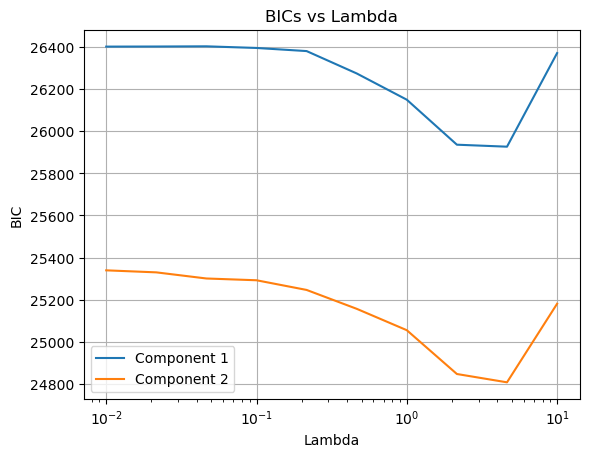

In [27]:
for i in range(BICs.shape[1]):
    plt.plot(thelam, BICs[:, i], label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('BIC')
plt.title('BICs vs Lambda')
plt.xscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

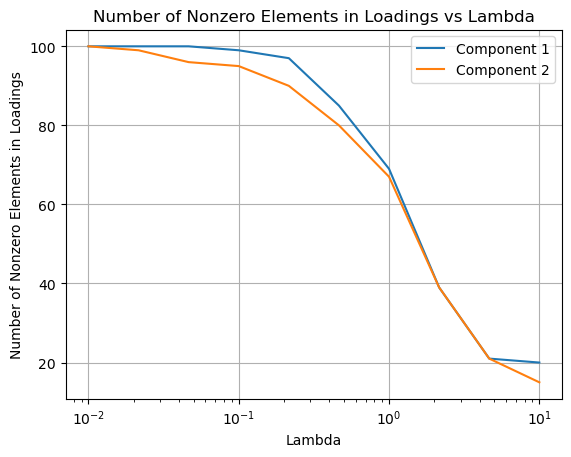

In [28]:
for i in range(zeros.shape[1]):
    plt.plot(thelam, zeros[:, i], label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('Number of Nonzero Elements in Loadings')
plt.title('Number of Nonzero Elements in Loadings vs Lambda')
plt.xscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

In [29]:
mu.shape

(100,)

In [30]:
np.mean(mu)

0.052624279581212116

In [31]:
A.shape

(200, 2)

In [32]:
B.shape

(100, 2)

In [33]:
np.count_nonzero(A, axis=0)

array([200, 200])

In [34]:
np.count_nonzero(B, axis=0)

array([21, 21])

In [35]:
np.dot(B.T, B)

array([[1.        , 0.00111067],
       [0.00111067, 1.        ]])

In [36]:
np.dot(A.T, A)

array([[7672.61634966,  277.23466856],
       [ 277.23466856, 3986.24113586]])

## Numerical Comparisons between SVD, LSVD and SLSVD

We compare the estimations of the loading matrix across three different dimension reduction methods. The metrics we use include Principal Angle, True Positive Rate (TPR), False Positive Rate (FPR), and Mean Square Error (MSE). It's easy to see that SLSVD outperforms all other methods!

In [37]:
bin_mat_c = bin_mat - np.mean(bin_mat, axis=0)
U, S, Vt = np.linalg.svd(bin_mat_c, full_matrices=False)

In [38]:
Vt[:, :2].shape

(100, 2)

In [39]:
loadings.shape

(100, 2)

In [40]:
B.shape

(100, 2)

In [41]:
B0.shape

(100, 2)

In [42]:
from slsvd.metrics import mse, principle_angle, true_positive_rate, false_positive_rate

### Comparison of Principle Angle

In [43]:
principle_angle(B, loadings),principle_angle(B0, loadings),principle_angle(Vt[:, :2], loadings)

(14.186741229793489, 19.456950594980345, 86.91505228482407)

### Comparison of True Positive Rate (TPR) and False Positive Rate (FPR)

In [44]:
true_positive_rate(B, loadings), false_positive_rate(B, loadings)

(1.0, 0.0125)

In [45]:
true_positive_rate(B0, loadings), false_positive_rate(B0, loadings)

(1.0, 1.0)

In [46]:
true_positive_rate(Vt[:, :2], loadings), false_positive_rate(Vt[:, :2], loadings)

(1.0, 1.0)

### Comparison of Mean Square Error (MSE)

In [47]:
mse(B,loadings),mse(B0,loadings), mse(Vt[:, :2],loadings)

(0.12996466111226085, 0.30667356211958535, 3.982815504660171)

## Visualization

We visualize the estimated scores from PCA, SVD, LSVD, and SLSVD. And we visualize the true loadings and estimated loadings from SLSVD in one figure. It's easy to see that SLSVD does a good job in estimated the sparse loadings from binary matrix data.

### Visualization of Binary Matrix Using PCA

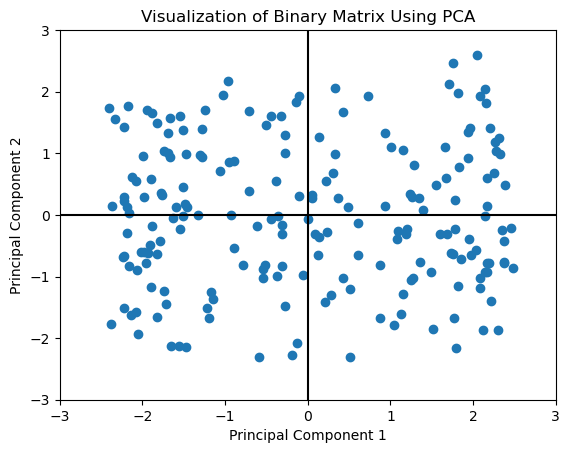

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bin_mat)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('Visualization of Binary Matrix Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### Visualization of Binary Matrix Using SVD

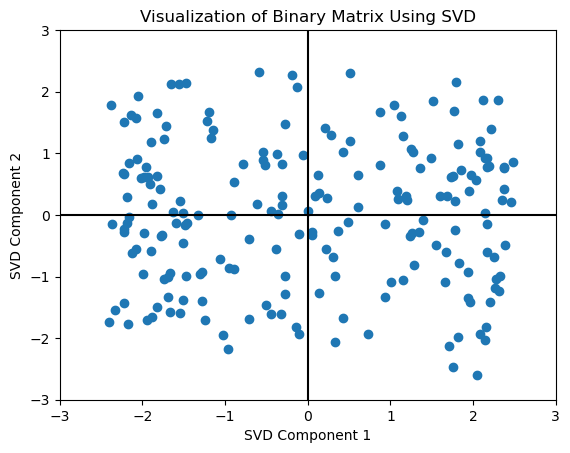

In [49]:
bin_mat_c = bin_mat - np.mean(bin_mat, axis=0)
U, S, Vt = np.linalg.svd(bin_mat_c, full_matrices=False)

svd_result = U[:, :2] * S[:2]

plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.title('Visualization of Binary Matrix Using SVD')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### Visualization of Binary Matrix Using Sparse Logistic SVD

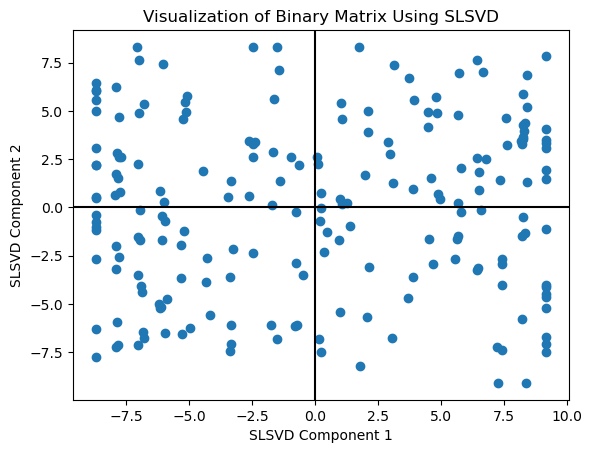

In [50]:
slsvd_result=A
plt.scatter(slsvd_result[:, 0], slsvd_result[:, 1])
plt.title('Visualization of Binary Matrix Using SLSVD')
plt.xlabel('SLSVD Component 1')
plt.ylabel('SLSVD Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.show()

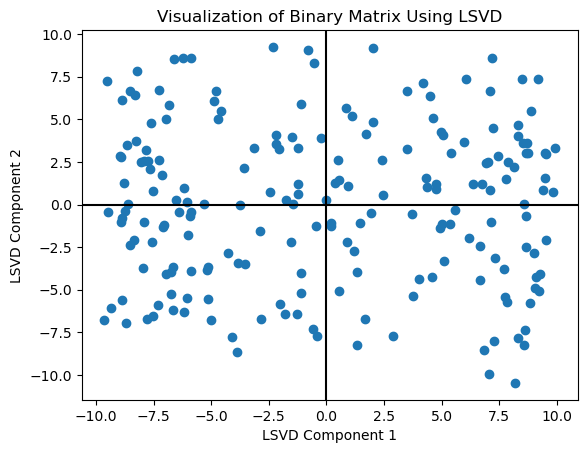

In [51]:
lsvd_result=A0
plt.scatter(lsvd_result[:, 0], lsvd_result[:, 1])
plt.title('Visualization of Binary Matrix Using LSVD')
plt.xlabel('LSVD Component 1')
plt.ylabel('LSVD Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.show()

### Visualization of Binary Matrix using SVD, LSVD and SLSVD

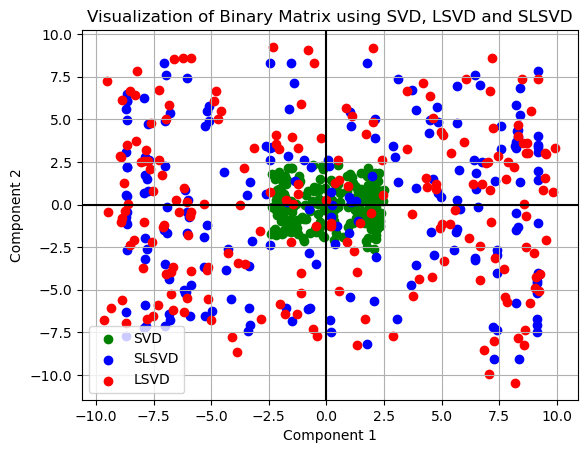

In [52]:
plt.scatter(svd_result[:, 0], svd_result[:, 1], color='green', label='SVD')

plt.scatter(slsvd_result[:, 0], slsvd_result[:, 1], color='blue', label='SLSVD')

plt.scatter(lsvd_result[:, 0], lsvd_result[:, 1], color='red', label='LSVD')

plt.title('Visualization of Binary Matrix using SVD, LSVD and SLSVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.legend()
plt.grid(True)
plt.show()


### Visualization of True Loadings and Estimated Loadings

In [53]:
np.count_nonzero(loadings, axis=0)

array([20, 20])

In [54]:
np.count_nonzero(B, axis=0)

array([21, 21])

In [55]:
np.dot(loadings.T, loadings)

array([[1., 0.],
       [0., 1.]])

In [56]:
np.dot(B.T, B)

array([[1.        , 0.00111067],
       [0.00111067, 1.        ]])

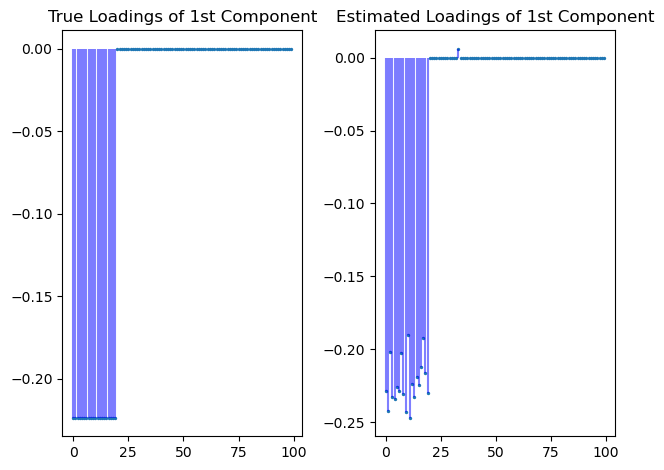

In [57]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 0])), B[:, 0], s=2)
for i, val in enumerate(B[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 1st Component')

plt.tight_layout()
plt.show()

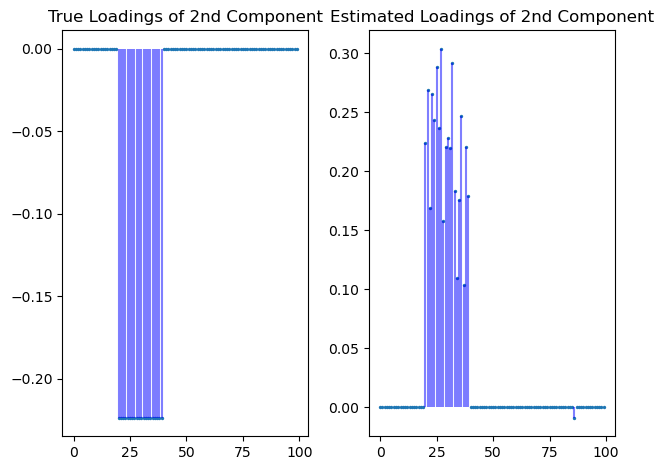

In [58]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 2nd Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), B[:, 1], s=2)
for i, val in enumerate(B[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 2nd Component')

plt.tight_layout()
plt.show()

## Reference

- Lee, S., Huang, J. Z., & Hu, J. (2010). Sparse logistic principal components analysis for binary data. The Annals of Applied Statistics, 4(3), 1579.

- Lee, S., & Huang, J. Z. (2013). A coordinate descent MM algorithm for fast computation of sparse logistic PCA. Computational Statistics & Data Analysis, 62, 26-38.
